## GATHERING DATA

The WeRateDogs Twitter archive consists of data gathered from the @dog_rates twitter account posted between November 2015 to August 2017. A total of 2356 tweets were extracted from 5000 tweets.

In [1]:
# necessary packages should be imported
import pandas
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use the keys to access twitter api
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [3]:
#read the twitter archive data csv file
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# query the twitter api
with open('tweet_json.txt','a',encoding = 'utf8') as file:
    for tweet_id in twitter_data['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, file)
            file.write('\n')
        except: 
            print('there is an error')

there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error
there is an error


Rate limit reached. Sleeping for: 684


there is an error
there is an error


Rate limit reached. Sleeping for: 700


In [5]:
twitter_tweet = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    twitter_tweet.append(tweet)
    
tweet_json.close()

In [6]:
twitter_df = pd.DataFrame()  # create a empty dataframe  

twitter_df['id'] = list(map(lambda tweet: tweet['id'], twitter_tweet))

twitter_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], twitter_tweet))

twitter_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], twitter_tweet))

In [7]:
# view data head
twitter_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7010,33828
1,892177421306343426,5302,29345
2,891815181378084864,3482,22069
3,891689557279858688,7228,36955
4,891327558926688256,7767,35327


In [8]:
# view data head for twitter-archive data
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# use the request library to download the image_prediction file
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [10]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [11]:
# read file as CSV
image_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t')

In [12]:
# view data head
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## ASSESSING DATA

> This data is going to be assessed visually and programmatically to identify quality and tidyness issues respectively. 

### Visual Assessment

> The three dataframes i will be working with are listed below. The visual assessment will hereby be carried out to identify quality issues.

* twitter_data
* twitter_df
* image_predictions_df

## Twitter_data

In [13]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
twitter_data.duplicated().sum()

0

In [18]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# from the description above, there are extreme rating numerator and denominator values as opposed to the benchmark of ten. other extreme values pose as errors. lets take a closer look.
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [20]:
twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
twitter_data.name.value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object>

> ### Image_predictions_df

In [22]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image_predictions_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

> ### Twitter_df

In [27]:
twitter_df.sample(15)

,id,retweet_count,favorite_count
7403,814530161257443328,1738,8199
3230,750011400160841729,821,3018
1233,709556954897764353,976,3029
600,796031486298386433,3508,10284
2261,666287406224695296,57,123
5803,714251586676113411,764,3035
5388,772193107915964416,1291,5685
5324,780931614150983680,6754,20500
4355,670676092097810432,35,215
2867,798340744599797760,3143,0


In [28]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9262 entries, 0 to 9261
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              9262 non-null   int64
 1   retweet_count   9262 non-null   int64
 2   favorite_count  9262 non-null   int64
dtypes: int64(3)
memory usage: 217.2 KB


In [29]:
twitter_df.describe()

,id,retweet_count,favorite_count
count,9.262000e+03,9262.000000,9262.000000
mean,7.420487e+17,2472.847225,7058.860289
std,6.816943e+16,4169.197676,10899.695477
min,6.660209e+17,1.000000,0.000000
25%,6.783968e+17,498.000000,1238.000000
50%,7.184600e+17,1166.000000,3068.000000
75%,7.986802e+17,2868.000000,8644.250000
max,8.924206e+17,70793.000000,144978.000000


#### The issues identified in the course of the assessment are hereunder listed
> ### twitter_data 
   Quality Issues
   * Columns associated with reply and retweets have numerous nan values
   * Expanded_urls column have 59 missing urls
   * The timestamp column datatype ought to be datetime instead of string
   * Inaccurate names like 'O', 'an, 'a' are found on the name column
   * Extreme figures are found on the rating_denominator column.
   * Extreme figures are found on the rating_numerator column.
>### image_prediction_df
   * There is need to rename the columns in the predictions dataframe to make them more descriptive
   * The columns showing dog breeds p1, p2 and p3 have some name with initial capital while some do not.
  
> Tidyness Issues
   * Dog stages are splitted into four columns rather than one
   * There is need to merge the twitter_data and twitter_df tables into one for ease of reference and analysis.
   

## CLEANING DATA

> The data is going to be cleaned according as the issues are listed above. Hovever, before the cleaning process, i'm going to make a copy of the dataframe.

In [30]:
# Make a master copy of tthe three dataframes.
twitter_cleaned_data = twitter_data.copy()
twitter_df_clean = twitter_df.copy()
image_predictions_clean = image_predictions_df.copy()

In [31]:
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Quality issues Cleaning

> ## 1. Rows and columns associated with reply and retweets have numerous nan values
*DEFINE*: To solve this issue the retweet rows will be dropped then the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns will also be dropped.

In [32]:
# DEFINE: currently there are 2356 rows and 17 columns, retweet rows and columns inclusive
twitter_cleaned_data.shape

(2356, 17)

In [33]:
# CODE: Drop rows associated with retweets
twitter_cleaned_data = twitter_cleaned_data[twitter_cleaned_data.retweeted_status_id.isnull()]
twitter_cleaned_data = twitter_cleaned_data[twitter_cleaned_data.retweeted_status_user_id.isnull()]
twitter_cleaned_data = twitter_cleaned_data[twitter_cleaned_data.retweeted_status_timestamp.isnull()]

In [34]:
# TEST: 181 rows have been dropped
twitter_cleaned_data.shape

(2175, 17)

In [35]:
# CODE: Drop the above mentioned columns
twitter_cleaned_data = twitter_cleaned_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [36]:
# TEST: chech to see if the columns have been dropped
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


> ## 2. Expanded_urls column have 59 missing urls
DEFINE: The cleaning process here involves dropping rows with missing urls

In [37]:
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [38]:
# CODE: Drop rows with missing URl
twitter_cleaned_data = twitter_cleaned_data[twitter_cleaned_data.expanded_urls.notnull()]

In [39]:
# TEST:confirm that rows with missing URLs have been dropped
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


> ## 3. The timestamp column datatype ought to be datetime instead of string
DEFINE: Change the timestamp datatype to datetime  

In [40]:
# CODE: change the dtype for timestamp to datetime
twitter_cleaned_data['timestamp'] = pd.to_datetime(twitter_cleaned_data['timestamp'])

In [41]:
# TEST
twitter_cleaned_data.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

> ## 4. Inaccurate names like 'O', 'an, 'a' are found on the name column
DEFINE: Those inaccurate names are going to be replaced with 'none'

In [42]:
# print out the list od the names to identify those that seen inaccurate
print(twitter_cleaned_data['name'].unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Gerald' 'Jeffrey' 'such' 'Canela' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella'
 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'a'
 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Steven'
 'Beau' 'Snoopy' 'Shadow' 'Emmy' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger'
 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Jed' 'Sebastian' 'Sierra'
 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover' 'Napolean' 'Boomer' 'Cody'
 'Rumble' 'Clifford' 'Dewey' 'Scout' 'Gizmo' 'Walter' 'Cooper' 'Harold'
 'Shikha' 'Lili' 'Jamesy' 'Coco' 'Sammy' 'Meatball' 'Paisley' 'Albus'
 'Neptune' 'Belle' 'Quinn' 'Zooey' 'Dave' 'Jersey' 'Hobbes' 'Burt'
 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper' 'quite' 'Sophie' 'Wyatt'
 'Rosie' 'Thor' 'Oscar' 'Callie' 'Cermet' 'Marlee' 'Arya' 'Einstein'
 'Alice' 'Rumpole' 'Benn

In [43]:
# chech the value_count of names
twitter_cleaned_data['name'].value_counts()

None          622
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [44]:
# CODE: Replace inaccurate names with none
twitter_cleaned_data['name'] = twitter_cleaned_data['name'].replace(['a','O', 'by', 'an'],'None')

In [45]:
# TEST: Check to see whether those corrections have been effected
twitter_cleaned_data['name'].value_counts()

None          685
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 952, dtype: int64

> ## 5. Wrong figures are found on the rating_denominator column.
DEFINE: to solve this problem, i will change all the incorrect rating_denominator values to 10 based on the ratings on the text column.

In [46]:
pd.set_option('display.max_colwidth', -1)
twitter_cleaned_data['text'].sample(2)

C:\Users\User\AppData\Local\Temp\ipykernel_9040\691203532.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


333    This is Willow. She's the official strawberry taste tester. Palate delicate af. Currently noting the subtle piquancy of this one. 13/10 https://t.co/On7muWnWSQ
840    This is Rupert. You betrayed him with bath time but he forgives you. Cuddly af 13/10 https://t.co/IEARC2sRzC                                                   
Name: text, dtype: object

In [47]:
# CODE: First of all i will extract the rows with rating_numerator above 10
num_de= twitter_cleaned_data[twitter_cleaned_data['rating_denominator'] != 10]

num_de[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [48]:
# change rating_denominators to the correct one as given in the text column for each rating
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 666287406224695296, ['rating_denominator']] = 10
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 722974582966214656, ['rating_denominator']] = 10

In [49]:
#TEST:
twitter_cleaned_data.loc[twitter_cleaned_data['tweet_id'] == 722974582966214656]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,10,None,None,None,None,None


In [50]:
#TEST:
twitter_cleaned_data.loc[twitter_cleaned_data['tweet_id'] == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,10,None,None,None,None,None


> ## 6. Wrong figures are found on the rating_numerator column.
DEFINE: to solve this problem, i will change all the incorrect ratinng_numerator values to the correvt value based on the ratings on the text column.

In [51]:
# change rating_numerators to the correct one as given in the text column for each rating
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 666287406224695296, ['rating_numerator']] = 9
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_cleaned_data.loc[twitter_cleaned_data.tweet_id == 722974582966214656, ['rating_numerator']] = 13

In [52]:
#TEST:
twitter_cleaned_data.loc[twitter_cleaned_data['tweet_id'] == 716439118184652801]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


> ## 7. There is need to rename the columns in the predictions dataframe to make them more descriptive.
DEFINE: The concerned column names will be replaced with more descriptive names.

In [53]:
# CODE: Give the columns more descriptive names
image_predictions_clean.rename(columns ={'img_num':'image_number', 'p1':'prediction_1', 'p1_conf':'prediction_1_configuration', 'p1_dog': 'prediction_1_dog', 
                                          'p2':'prediction_2', 'p2_conf':'prediction_2_configuration', 'p2_dog': 'prediction_2_dog',
                                          'p3':'prediction_3', 'p3_conf':'prediction_3_configuration', 'p3_dog': 'prediction_3_dog'}, inplace = True)

In [54]:
# TEST
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   jpg_url                     2075 non-null   object 
 2   image_number                2075 non-null   int64  
 3   prediction_1                2075 non-null   object 
 4   prediction_1_configuration  2075 non-null   float64
 5   prediction_1_dog            2075 non-null   bool   
 6   prediction_2                2075 non-null   object 
 7   prediction_2_configuration  2075 non-null   float64
 8   prediction_2_dog            2075 non-null   bool   
 9   prediction_3                2075 non-null   object 
 10  prediction_3_configuration  2075 non-null   float64
 11  prediction_3_dog            2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> ## 8. The columns showing dog breeds p1, p2 and p3 have some name with initial capital while some do not.
DEFINE: All the affected names will be converted to initial capital.  

In [55]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_configuration,prediction_1_dog,prediction_2,prediction_2_configuration,prediction_2_dog,prediction_3,prediction_3_configuration,prediction_3_dog
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/800018199223959552/pu/img/3Qp73edtkZO-qWPy.jpg,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
796,690959652130045952,https://pbs.twimg.com/media/CZbIIM-WkAIPClg.jpg,2,golden_retriever,0.862964,True,Labrador_retriever,0.044865,True,Saluki,0.012468,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
396,673656262056419329,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,0.960543,True,Pomeranian,0.012192,True,white_wolf,0.004753,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1802,832032802820481025,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1,whippet,0.601712,True,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True
1255,748346686624440324,https://pbs.twimg.com/media/CmKpVtlWAAEnyHm.jpg,1,borzoi,0.596455,True,whippet,0.231428,True,Saluki,0.058261,True


In [56]:
# View the number of uncapitalised names in prectiction_1
image_predictions_clean['prediction_1'].str.islower().sum()

1135

In [57]:
# CODE: Captalise the first letter of those words
image_predictions_clean['prediction_1'] = image_predictions_clean.prediction_1.str.capitalize()

In [58]:
# TEST
image_predictions_clean['prediction_1'].str.islower().sum()

0

In [59]:
# View the number of uncapitalised names in prectiction_2
image_predictions_clean['prediction_2'].str.islower().sum()

1096

In [60]:
# CODE: Captalise the first letter of those words
image_predictions_clean['prediction_2'] = image_predictions_clean.prediction_2.str.capitalize()

In [61]:
#TEST:
image_predictions_clean['prediction_2'].str.islower().sum()

0

In [62]:
# View the number of uncapitalised names in prectiction_3
image_predictions_clean['prediction_3'].str.islower().sum()

1131

In [63]:
# CODE: Captalise the first letter of those words
image_predictions_clean['prediction_3'] = image_predictions_clean.prediction_3.str.capitalize()

In [64]:
# TEST
image_predictions_clean['prediction_3'].str.islower().sum()

0

In [65]:
# TEST: View samples
image_predictions_clean
image_predictions_clean.sample(20)

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_configuration,prediction_1_dog,prediction_2,prediction_2_configuration,prediction_2_dog,prediction_3,prediction_3_configuration,prediction_3_dog
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,Bloodhound,0.528819,True,Bull_mastiff,0.420119,True,French_bulldog,0.009481,True
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,Chow,0.999823,True,Norwich_terrier,0.000056,True,Pomeranian,0.000028,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden_retriever,0.841001,True,Great_pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,Leatherback_turtle,0.280835,False,Loggerhead,0.123290,False,Dandie_dinmont,0.086792,True
1642,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,Golden_retriever,0.873233,True,Cocker_spaniel,0.033693,True,Chow,0.020408,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,Guinea_pig,0.996496,False,Skunk,0.002402,False,Hamster,0.000461,False
1092,719551379208073216,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1,Malamute,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,Malinois,0.706038,True,German_shepherd,0.165655,True,Great_dane,0.059048,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_bay_retriever,0.193575,True,Rottweiler,0.001193,True
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True


#### TIDINESS ISSUES CLEANING

> ## 1. Dog stages are splitted into four columns rather than one
*DEFINE*: The four columns of dog stages will be merged into one.

In [66]:
twitter_cleaned_data.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1414,698710712454139905,2016-02-14 03:29:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cuddles. He's not entirely sure how doors work. 10/10 I believe in you Cuddles https://t.co/rKjK88D05Z,https://twitter.com/dog_rates/status/698710712454139905/photo/1,10,10,Cuddles,None,None,None,None
2064,671154572044468225,2015-11-30 02:31:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu,https://twitter.com/dog_rates/status/671154572044468225/photo/1,11,10,Holly,None,None,None,None
1896,674739953134403584,2015-12-09 23:58:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶""\n11/10 https://t.co/URNs5zFskc",https://twitter.com/dog_rates/status/674739953134403584/photo/1,11,10,None,None,None,None,None
2183,668989615043424256,2015-11-24 03:08:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,10,Bernie,None,None,None,None
2174,669216679721873412,2015-11-24 18:11:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clarq. He's a golden Quetzalcoatl. Clarq enjoys eating his own foot. Damn it Clarq. 8/10 would pet firmly https://t.co/d8ybynaRwZ,https://twitter.com/dog_rates/status/669216679721873412/photo/1,8,10,Clarq,None,None,None,None
1118,732005617171337216,2016-05-16 00:31:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Larry. He has no self control. Tongue still nifty af tho 11/10 https://t.co/ghyT4Ubk1r,"https://twitter.com/dog_rates/status/732005617171337216/photo/1,https://twitter.com/dog_rates/status/732005617171337216/photo/1",11,10,Larry,None,None,None,None
1755,678774928607469569,2015-12-21 03:12:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tug. He's not required to wear the cone he just wants his voice to project more clearly. 11/10 https://t.co/Sp739Ou2qx,https://twitter.com/dog_rates/status/678774928607469569/photo/1,11,10,Tug,None,None,None,None
2325,666418789513326592,2015-11-17 00:53:15+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,https://twitter.com/dog_rates/status/666418789513326592/photo/1,10,10,Walter,None,None,None,None
1304,707411934438625280,2016-03-09 03:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius."" Both 11/10 https://t.co/uQsCJ8pf51",https://twitter.com/dog_rates/status/707411934438625280/photo/1,11,10,None,None,None,pupper,None
1453,695629776980148225,2016-02-05 15:27:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Calvin. He's proof that degrees mean absolutely nothing. 8/10 straighten up pup https://t.co/NIvxgSQ9BS,"https://twitter.com/dog_rates/status/695629776980148225/photo/1,https://twitter.com/dog_rates/status/695629776980148225/photo/1",8,10,Calvin,None,None,None,None


In [67]:
# CODE: replace none values with NaN
twitter_cleaned_data['doggo'].replace('None', np.NaN, inplace = True)
twitter_cleaned_data['floofer'].replace('None', np.NaN, inplace = True)
twitter_cleaned_data['pupper'].replace('None', np.NaN, inplace = True)
twitter_cleaned_data['puppo'].replace('None', np.NaN, inplace = True)

In [68]:
twitter_cleaned_data.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
963,750719632563142656,2016-07-06 15:54:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t.co/WS6BoApYyL,https://twitter.com/dog_rates/status/750719632563142656/photo/1,12,10,Meyer,NaN,NaN,NaN,NaN
673,789628658055020548,2016-10-22 00:45:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eli. He can fly. 13/10 magical af https://t.co/huPSJJ7FDI,https://twitter.com/dog_rates/status/789628658055020548/photo/1,13,10,Eli,NaN,NaN,NaN,NaN
1817,676603393314578432,2015-12-15 03:23:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Godzilla pupper. He had a ruff childhood &amp; now deflects that pain outward by terrorizing cities. Tragic 9/10 https://t.co/g1tLGkyaxr,https://twitter.com/dog_rates/status/676603393314578432/photo/1,9,10,Godzilla,NaN,NaN,pupper,NaN
2084,670807719151067136,2015-11-29 03:33:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents https://t.co/idzH8JH06g","https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1",11,10,Andy,NaN,NaN,NaN,NaN
1867,675334060156301312,2015-12-11 15:19:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good morning here's a grass pupper. 12/10 https://t.co/2d68FmWGGs,"https://twitter.com/dog_rates/status/675334060156301312/photo/1,https://twitter.com/dog_rates/status/675334060156301312/photo/1",12,10,None,NaN,NaN,pupper,NaN
219,850145622816686080,2017-04-07 00:38:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. He's making new friends. Jubilant as h*ck for the fun times ahead. 11/10 for all pups pictured https://t.co/PCX25VV78l,"https://twitter.com/dog_rates/status/850145622816686080/photo/1,https://twitter.com/dog_rates/status/850145622816686080/photo/1,https://twitter.com/dog_rates/status/850145622816686080/photo/1,https://twitter.com/dog_rates/status/850145622816686080/photo/1",11,10,Riley,NaN,NaN,NaN,NaN
717,783695101801398276,2016-10-05 15:47:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Loomis. He's the leader of the Kenneth search party. The passion is almost overwhelming. 12/10 one day he will be free https://t.co/kCRKlFg4AY,"https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1",12,10,Loomis,NaN,NaN,NaN,NaN
1768,678389028614488064,2015-12-20 01:38:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,https://twitter.com/dog_rates/status/678389028614488064/photo/1,11,10,Bella,NaN,NaN,pupper,NaN
789,773985732834758656,2016-09-08 20:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort https://t.co/RFWtDqTnAz,"https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1,https://twitter.com/dog_rates/status/773985732834758656/photo/1",11,10,Winnie,

In [69]:
# CODE: merge columns into a new column dog_stages
twitter_cleaned_data['dog_stages'] = twitter_cleaned_data['doggo'] + twitter_cleaned_data['floofer'] + twitter_cleaned_data['pupper'] + twitter_cleaned_data['puppo']

In [70]:
# TEST:
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               84 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              232 non-null    object             
 11  puppo               24 non-null     object             
 12  dog_stages          0 non-null    

In [71]:
twitter_cleaned_data['dog_stages'] = twitter_cleaned_data.loc[:,'doggo':'puppo'].fillna(method='ffill',axis=1)['puppo']
twitter_cleaned_data['dog_stages'].value_counts()

pupper     232
doggo      72 
puppo      24 
floofer    10 
Name: dog_stages, dtype: int64

In [72]:
twitter_cleaned_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [73]:
 # drop the 4 columns
twitter_cleaned_data.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [74]:
# TEST:
twitter_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   dog_stages          338 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.4+ KB


> ## 2. There is need to merge the twitter_data, image_predictions and twitter_df tables into one for ease of reference and analysis
*DEFINE*: The three tables will be merged into one.

In [75]:
# CODE: Give the columns more descriptive names
twitter_df_clean.rename(columns ={'id':'tweet_id'}, inplace = True)

In [76]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9262 entries, 0 to 9261
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        9262 non-null   int64
 1   retweet_count   9262 non-null   int64
 2   favorite_count  9262 non-null   int64
dtypes: int64(3)
memory usage: 217.2 KB


In [77]:
sum(image_predictions_clean.tweet_id.duplicated()), sum(twitter_df_clean.tweet_id.duplicated()), sum(twitter_cleaned_data.tweet_id.duplicated())

(0, 6935, 0)

In [78]:
# create a copy of tables to be merged
image_predictions_join = image_predictions_clean.copy()
twitter_df_join = twitter_df_clean.copy()
twitter_cleaned_clean = twitter_cleaned_data.copy()

In [79]:
# merge tables
merger_df = pd.merge(image_predictions_join, twitter_cleaned_clean, how='left', on=['tweet_id'])

In [80]:
# TEST:
merger_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   jpg_url                     2075 non-null   object             
 2   image_number                2075 non-null   int64              
 3   prediction_1                2075 non-null   object             
 4   prediction_1_configuration  2075 non-null   float64            
 5   prediction_1_dog            2075 non-null   bool               
 6   prediction_2                2075 non-null   object             
 7   prediction_2_configuration  2075 non-null   float64            
 8   prediction_2_dog            2075 non-null   bool               
 9   prediction_3                2075 non-null   object             
 10  prediction_3_configuration  2075 non-null   float64         

In [81]:
# CODE: Merge columns
merged_df = pd.merge(merger_df, twitter_df_join, how='left', on=['tweet_id'])

In [82]:
# TEST:
merged_df.head()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_configuration,prediction_1_dog,prediction_2,prediction_2_configuration,prediction_2_dog,prediction_3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,423.0,2294.0
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,423.0,2292.0
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,423.0,2292.0
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,421.0,2285.0
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,None,NaN,39.0,112.0


## STORE DATA

In [83]:
merged_df.to_csv('twitter_archive_master.csv', index = False)

## ANALYSING AND VISUALISING DATA

In [84]:
# read data frame
df = pd.read_csv('twitter_archive_master.csv')

> ### INSIGHT ONE: What dog stage has the highest favorite count

In [85]:
# sort favourite_count column in descending order
df.sort_values('favorite_count', ascending=False)

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_configuration,prediction_1_dog,prediction_2,prediction_2_configuration,prediction_2_dog,prediction_3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
4843,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,...,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,70793.0,144978.0
4844,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,...,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,70784.0,144952.0
4845,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,...,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,70775.0,144938.0
4846,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,...,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,70455.0,144455.0
6912,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,...,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,puppo,39940.0,124162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_staffordshire_terrier,0.149950,True,Chesapeake_bay_retriever,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7690,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,House_finch,0.209852,False,Cocker_spaniel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7851,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,Flat-coated_retriever,0.008178,True,Chesapeake_bay_retriever,...,2017-06-07 01:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",13.0,10.0,Harry,NaN,NaN,NaN
7876,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U

finding: The highest favorite count can be found on the doggo dog stage

 > ### INSIGHT TWO: What dog stage have the highest value count

In [86]:
# count values in dog_stages column
vis_1 = df.dog_stages.value_counts()

In [87]:
vis_1

pupper     848
doggo      249
puppo      91 
floofer    32 
Name: dog_stages, dtype: int64

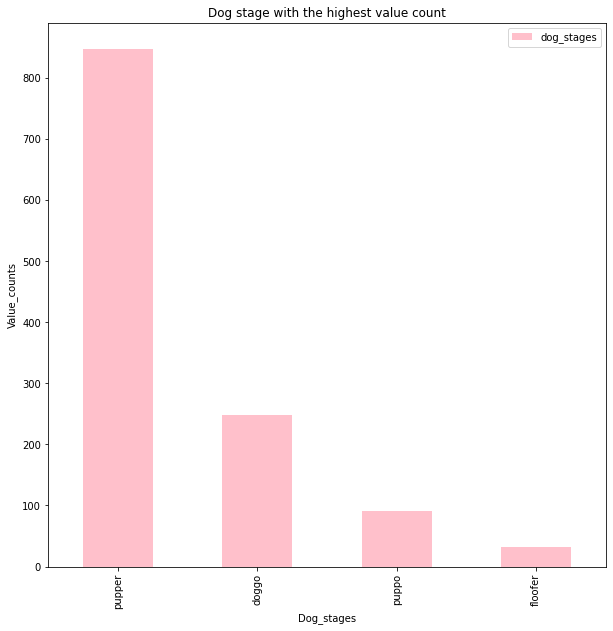

In [88]:
# create a visualisation
vis_1.plot.bar(x="value_counts",y='dog_stages', title= 'Dog stage with the highest value count',
figsize=(10, 10),
ylabel="Value_counts", 
xlabel = "Dog_stages",color="pink")
plt.legend();

Finding: Pupper dog stage have the highest value_count

 > ### INSIGHT THREE: What dog name have the highest popularity

In [98]:
# count values in name column
df.name.value_counts()

None       2412
Charlie    41  
Cooper     40  
Oliver     40  
Lucy       37  
           ..  
Shaggy     3   
Filup      3   
Ron        3   
Astrid     1   
Harry      1   
Name: name, Length: 932, dtype: int64

Finding: Aside from the names that is stated as none, the dog name with the highest popularity is Charlie.